In [ ]:
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
#import library

In [ ]:
import pandas as pd 
df= pd.read_csv("/content/drive/MyDrive/Copy of Advertising.csv",index_col=0,header=0)

In [ ]:
df.head(6)

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
6,8.7,48.9,75.0,7.2


In [ ]:
df.dtypes

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [ ]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [ ]:
df.shape

(200, 4)

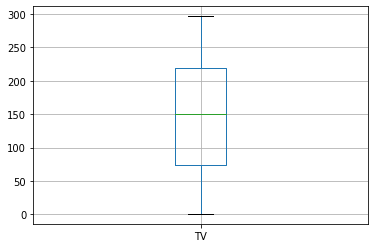

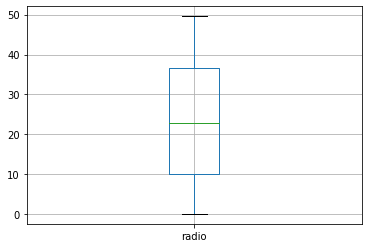

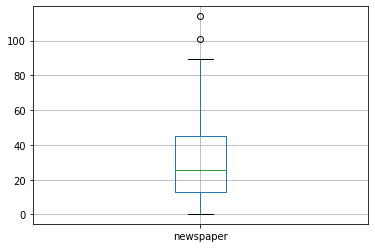

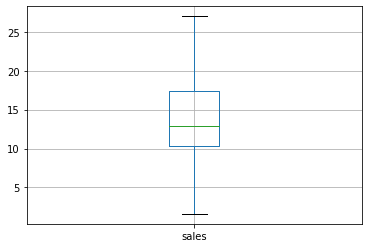

In [ ]:
for i in df.columns:
  df.boxplot(column=i)
  plt.show()

<Figure size 2160x1080 with 0 Axes>

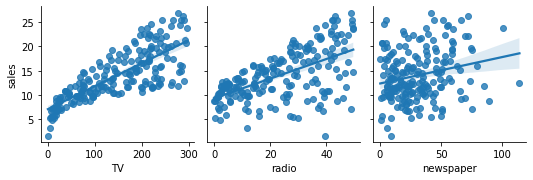

In [ ]:
#Assumption 2:Assumption of Linearity:Every ind var should have a linear relationship with the dep var.
plt.figure(figsize=(30,15))
sns.pairplot(df,x_vars=df.columns[0:-1],y_vars="sales",kind='reg')
plt.show()

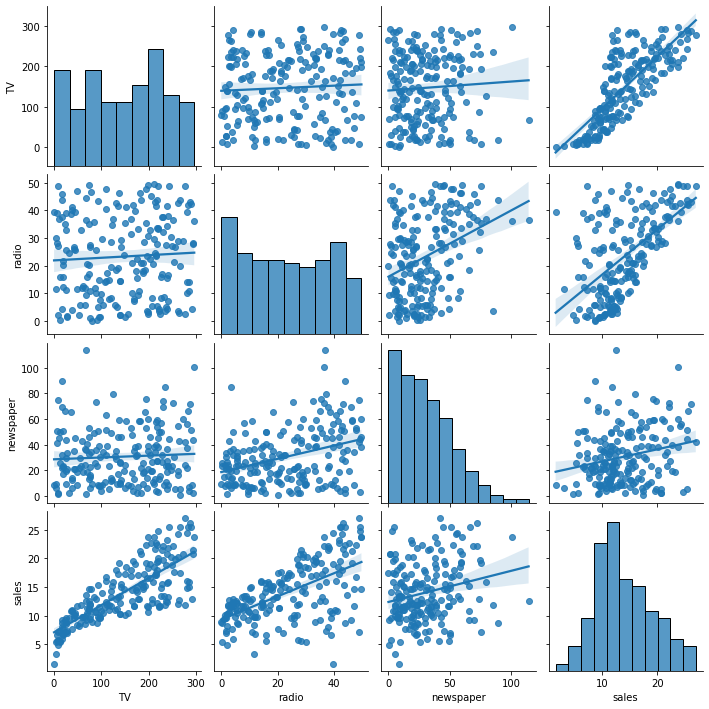

In [ ]:
sns.pairplot(df,kind="reg")

In [ ]:
#data.drop(["newspaper"],axis=1,inplace=True)

In [ ]:
#creat X and Y

In [ ]:
X= df[["newspaper","TV","radio"]]

In [ ]:
Y=df[["sales"]]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


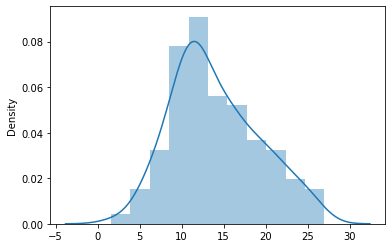

In [ ]:
#Assumption of Normality: The dependent variable should follow an approximate normal distribtion
sns.distplot(Y,hist=True)

In [ ]:
"""
# Log transformation
import numpy as np
Y_l"""

'\n# Log transformation\nimport numpy as np\nY_l'

In [ ]:
#import numpy as np
#Y_log  = np.log(Y)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


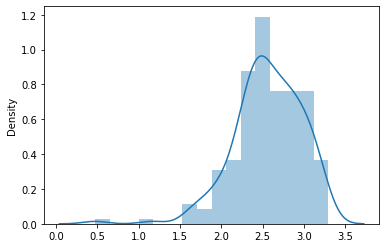

In [ ]:
#sns.distplot(Y_log,hist=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9dfa650810>,
      dtype=object)

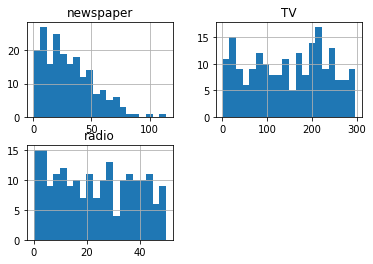

In [ ]:
X.hist(bins=20)

In [ ]:
#newpaper is positively skewed

In [ ]:
from scipy.stats import skew
#finding the skewness in each variable
data_num_skew = X.apply(lambda i: skew(i.dropna()))
#subsetting the variables that are highly skewed
data_num_skewed = data_num_skew[(data_num_skew > .75) | (data_num_skew < -.75)]




print(data_num_skew)
print(data_num_skewed)
import numpy as np
# apply log + 1 transformation for all numeric features with skewness over .75
X[data_num_skewed.index] = np.log1p(X[data_num_skewed.index])

newspaper    0.887996
TV          -0.069328
radio        0.093467
dtype: float64
newspaper    0.887996
dtype: float64


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [ ]:
          X.newspaper.skew()

-0.7998749355228585

           newspaper        TV     radio
newspaper   1.000000  0.030951  0.251909
TV          0.030951  1.000000  0.054809
radio       0.251909  0.054809  1.000000


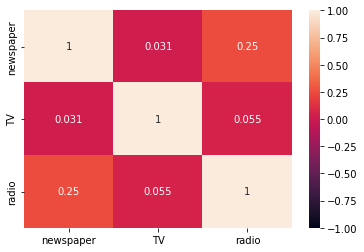

In [ ]:
#Assumption of no multicollinearity: There should be no multicollinearity between the independent variables
corr_df=X.corr(method="pearson")
print(corr_df)

sns.heatmap(corr_df,vmax=1.0,vmin=-1.0,annot=True)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

vif_df = pd.DataFrame()
vif_df["features"] = X.columns
vif_df["VIF Factor"] = [vif(X.values, i) for i in range(X.shape[1])]
vif_df.round(2)



,features,VIF Factor
0,newspaper,5.44
1,TV,3.39
2,radio,3.63


In [ ]:
#X.drop("newspaper",axis=1,inplace=True)
#rerun the VIF code

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.model_selection import train_test_split

#Split the data into test and train
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,
random_state=10)

In [ ]:
print(X_test.shape , X_train.shape , Y_test.shape ,Y_train.shape)

(40, 3) (160, 3) (40, 1) (160, 1)


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
#create a model function
lm=LinearRegression()
#create a training model
lm.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print(lm.intercept_)

[3.35329139]


In [ ]:
print(lm.coef_)

[[-0.04895137  0.0437425   0.19303708]]


In [ ]:
# pair the feature names with the coefficients
print(list(zip(X.columns, lm.coef_)))

[('newspaper', array([-0.04895137,  0.0437425 ,  0.19303708]))]


In [ ]:
print(X)

     newspaper     TV  radio
1     4.251348  230.1   37.8
2     3.830813   44.5   39.3
3     4.252772   17.2   45.9
4     4.085976  151.5   41.3
5     4.084294  180.8   10.8
..         ...    ...    ...
196   2.694627   38.2    3.7
197   2.208274   94.2    4.9
198   2.001480  177.0    9.3
199   4.207673  283.6   42.0
200   2.272126  232.1    8.6

[200 rows x 3 columns]


In [ ]:
# pair the feature names with the coefficients
print(list(zip(X.columns, lm.coef_.ravel())))

[('newspaper', -0.048951368222487274), ('TV', 0.043742501577421655), ('radio', 0.19303707897345287)]


In [ ]:
X1=100
X2=100
X3=np.log1p(100)
Y_pred=3.3532913858151474+(0.0437425 *X1)+(0.19303708*X2)+(-0.04895137*X3)
print(Y_pred)

26.805332913800658


In [ ]:
# newpaper having negetive effect in sales

In [ ]:
X1=100
X2=200
X3=np.log1p(0)
Y_pred=3.3532913858151474+(0.0437425 *X1)+(0.19303708*X2)+(-0.04895137*X3)
print(Y_pred)

46.334957385815144


In [ ]:
Y_pred=(lm.predict(X_test))

In [ ]:
print(Y_pred)

[[18.15026866]
 [12.96136899]
 [18.05815332]
 [23.66025079]
 [20.68751041]
 [14.26325872]
 [14.92774472]
 [21.38847375]
 [21.14752911]
 [12.75788534]
 [23.99735583]
 [ 7.20632737]
 [12.30777109]
 [19.22813333]
 [19.41581583]
 [13.44985803]
 [19.62619644]
 [ 9.24667496]
 [21.1052867 ]
 [20.87838433]
 [15.52611251]
 [10.91695579]
 [22.82910679]
 [15.82915597]
 [17.40742204]
 [ 8.17170435]
 [11.88738387]
 [12.69866637]
 [21.71275044]
 [ 7.94920205]
 [12.49118989]
 [20.43292079]
 [ 4.71443086]
 [ 4.72126238]
 [16.7504848 ]
 [15.74384945]
 [ 6.74775596]
 [17.73750244]
 [ 9.01170001]
 [13.60841593]]


In [ ]:
lm.score(X_train,Y_train)

0.9208986647500219

In [ ]:
new_df=pd.DataFrame()
new_df=X_test

new_df["Actual sales"]=Y_test
new_df["Predicted sales"]=Y_pred
new_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,newspaper,TV,radio,Actual sales,Predicted sales
60,2.332144,210.7,29.5,18.4,18.150269
6,4.330733,8.7,48.9,7.2,12.961369
21,3.996364,218.4,27.7,18.0,18.058153
199,4.207673,283.6,42.0,25.5,23.660251
53,3.703768,216.4,41.7,22.6,20.687510
20,3.000720,147.3,23.9,14.6,14.263259
163,3.280911,188.4,18.1,14.9,14.927745
56,4.110874,198.9,49.4,23.7,21.388474
70,3.339322,216.8,43.9,22.3,21.147529
3,4.252772,17.2,45.9,9.3,12.757885


In [ ]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.8348010719035321
RMSE: 2.5929769110930594
Adj R-square: 0.8322725168816474


In [ ]:
print(Y_test.min())
print(Y_test.max())

sales    1.6
dtype: float64
sales    25.5
dtype: float64


In [ ]:
new_df["Deviation"]=new_df["Actual sales"]-new_df["Predicted sales"]
new_df.to_excel("Sales Prediction.xlsx",header=True,index=True)
new_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,newspaper,TV,radio,Actual sales,Predicted sales,Deviation
60,2.332144,210.7,29.5,18.4,18.150269,0.249731
6,4.330733,8.7,48.9,7.2,12.961369,-5.761369
21,3.996364,218.4,27.7,18.0,18.058153,-0.058153
199,4.207673,283.6,42.0,25.5,23.660251,1.839749
53,3.703768,216.4,41.7,22.6,20.687510,1.912490


In [ ]:
from sklearn.model_selection import train_test_split

#Split the data into test and train
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,
random_state=10)

In [ ]:
Y_pred=lm.predict(X_test)

from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(Y_test,Y_pred)
print(r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print(rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print(adjusted_r_squared)


"""
Previous values:
0.834801071903532
2.59297691109306
0.8322725168816474
"""



from sklearn.linear_model import Lasso
lm = Lasso()
lm.fit(X_train,Y_train)

# print intercept and coefficients
print (lm.intercept_)
print (lm.coef_)

0.8348010719035321
2.5929769110930594
0.8322725168816474
[3.33679406]
[-0.          0.04362374  0.18766033]


In [ ]:
Y_pred=lm.predict(X_test)

from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(Y_test,Y_pred)
print(r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print(rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print(adjusted_r_squared)


"""
Previous values:
0.834801071903532
2.59297691109306
0.8322725168816474
"""



0.8360506658527163
2.583151427109424
0.8335412372688292


'\nPrevious values:\n0.834801071903532\n2.59297691109306\n0.8322725168816474\n'

In [ ]:
#stat model linear regression

#OLS-->OLS(Y_train, X_train)
#ols-->ols(Y~X1+X2+X3)



In [ ]:
new_df = pd.DataFrame()
new_df = X_train
new_df["sales"] = Y_train
new_df.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


(160, 4)

In [ ]:
import statsmodels.formula.api as sm

# create a fitted model with all three features
lm_model = sm.ols(formula='sales ~ TV + radio + newspaper', data=new_df).fit()

# print the coefficients
print(lm_model.params)
print(lm_model.summary())

"""
3.3532913858151527
[ 0.0437425 0.19303708 -0.04895137]

"""


Intercept    3.353291
TV           0.043743
radio        0.193037
newspaper   -0.048951
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     605.4
Date:                Sun, 24 Oct 2021   Prob (F-statistic):           1.10e-85
Time:                        10:13:55   Log-Likelihood:                -276.63
No. Observations:                 160   AIC:                             561.3
Df Residuals:                     156   BIC:                             573.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

'\n3.3532913858151527\n[ 0.0437425 0.19303708 -0.04895137]\n\n'

In [ ]:
import statsmodels.formula.api as sm

# create a fitted model with all three features
lm_model = sm.ols(formula='sales ~ TV + radio', data=new_df).fit()

# print the coefficients
print(lm_model.params)
print(lm_model.summary())


Intercept    3.217026
TV           0.043721
radio        0.192425
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     912.9
Date:                Sun, 09 May 2021   Prob (F-statistic):           3.47e-87
Time:                        04:11:12   Log-Likelihood:                -276.70
No. Observations:                 160   AIC:                             559.4
Df Residuals:                     157   BIC:                             568.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------

In [ ]:
Y_pred=lm.predict(X_test)

from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(Y_test,Y_pred)
print(r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print(rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print(adjusted_r_squared)

0.8360506658527163
2.583151427109424
0.8335412372688292


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Residuals')

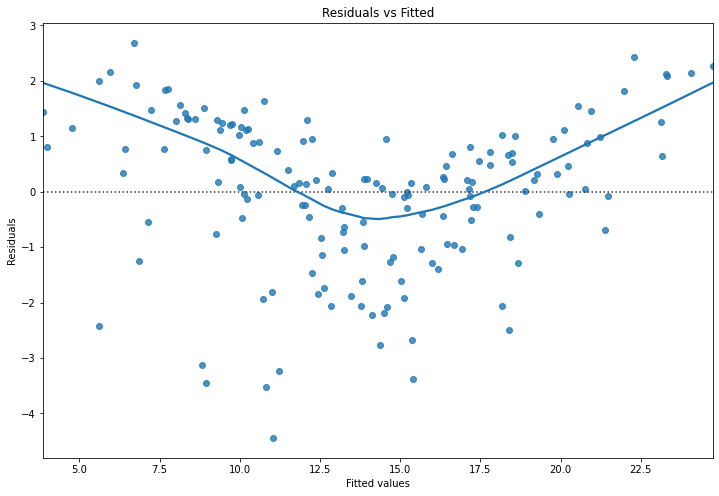

In [ ]:
#Assumption: Errors should be random
#checked using Residual v/s Fitted plot

import matplotlib.pyplot as plt
plot_lm_1 = plt.figure(1)
plot_lm_1.set_figheight(8)
plot_lm_1.set_figwidth(12)

# fitted values (need a constant term for intercept)
model_fitted_y = lm_model.fittedvalues

plot_lm_1.axes[0] = sns.residplot(model_fitted_y, 'sales', data=new_df, lowess=True)

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals')

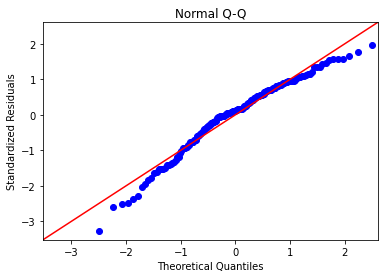

In [ ]:
#Assumption: Errors should follow a approximate normal distribution
#checked using Normal QQ plot

res = lm_model.resid
import statsmodels.api as stm
import scipy.stats as stats
fig = stm.qqplot(res, fit=True, line='45')
plt.title('Normal Q-Q')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Standardized Residuals')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, '$\\sqrt{|Standardized Residuals|}$')

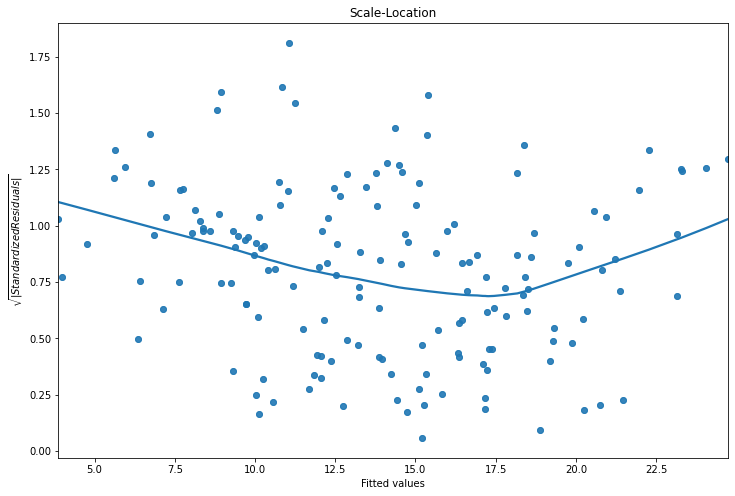

In [ ]:
#Assumption: Errors should follow a constant variance-->Homoskedasticity
#checked using Scale location plot

# normalized residuals
model_norm_residuals = lm_model.get_influence().resid_studentized_internal
# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))

plot_lm_3 = plt.figure(3)
plot_lm_3.set_figheight(8)
plot_lm_3.set_figwidth(12)
plt.scatter(model_fitted_y, model_norm_residuals_abs_sqrt, alpha=0.5)
sns.regplot(model_fitted_y, model_norm_residuals_abs_sqrt, lowess=True)


plot_lm_3.axes[0].set_title('Scale-Location')
plot_lm_3.axes[0].set_xlabel('Fitted values')
plot_lm_3.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$')